In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
24,246 cases (7 day average) as of Tue 06 Jul, +1,197.9 since Mon 05 Jul
379 hospitalised (7 day average) as of Wed 07 Jul, +0.0 since Wed 07 Jul
20 died (7 day average) as of Tue 06 Jul, -0.3 since Mon 05 Jul


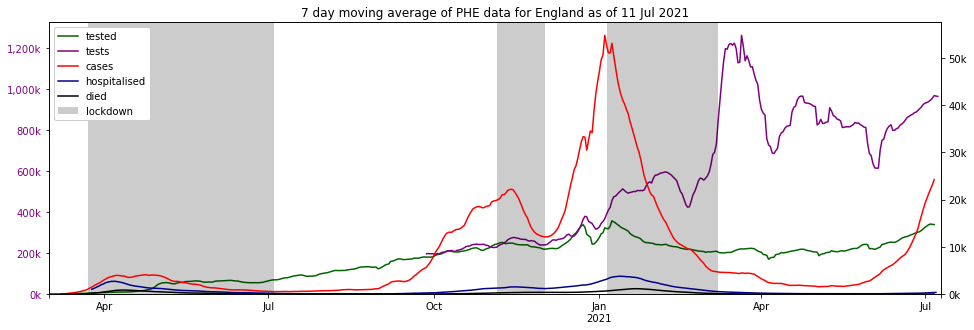

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

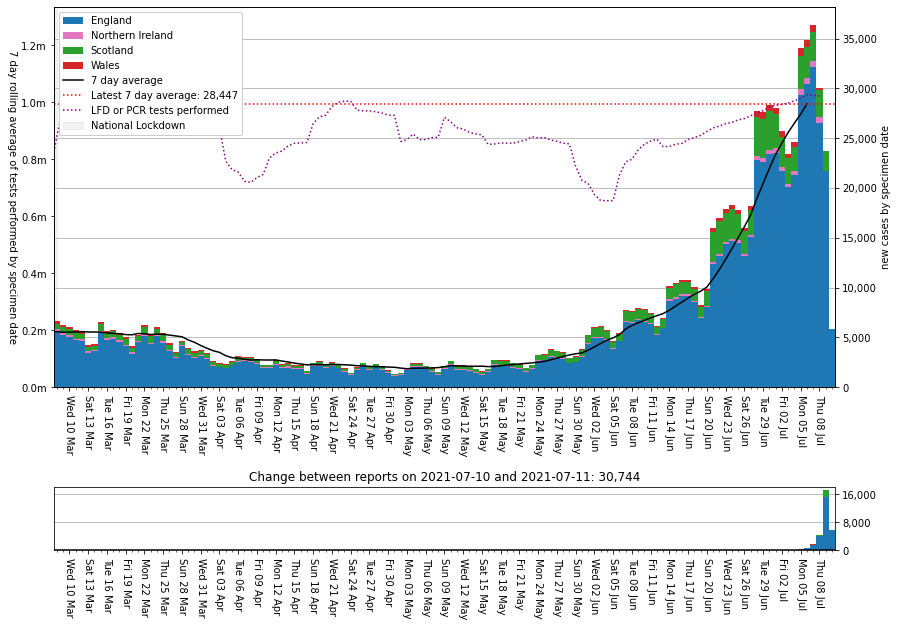

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

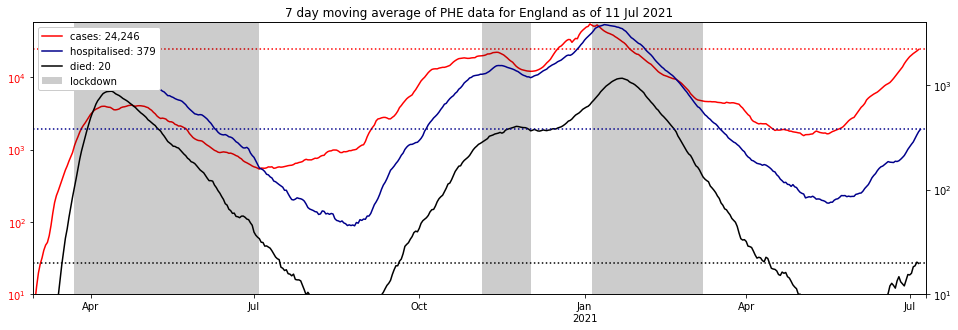

In [5]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,),
             right_series=(s.new_admissions_sum, s.new_deaths_sum))

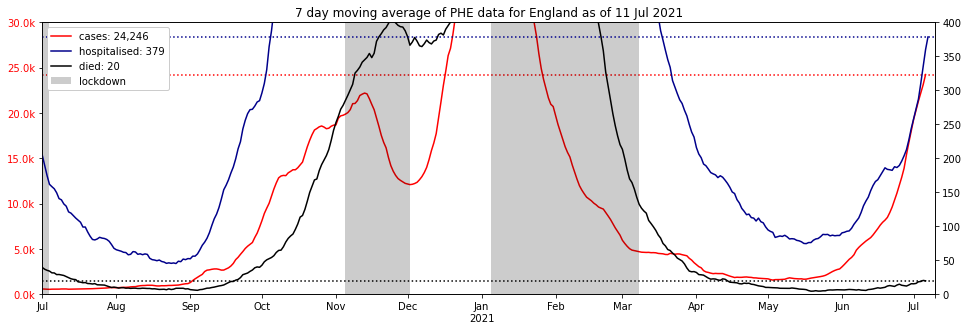

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=30_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=400)

In [7]:
vaccination_changes()

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,29123541.0,38495266.0,9371725.0,56286961,51.741186,16.649904,31.608910
1,Northern Ireland,N92000002,938477.0,1184485.0,246008.0,1893667,49.558713,12.991091,37.450196
2,Scotland,S92000003,2877326.0,3928409.0,1051083.0,5463300,52.666447,19.238976,28.094577
3,Wales,W92000004,1825167.0,2273561.0,448394.0,3152879,57.888901,14.221732,27.889367


'partial: 45,881,721 (68.7%), full: 34,764,511'

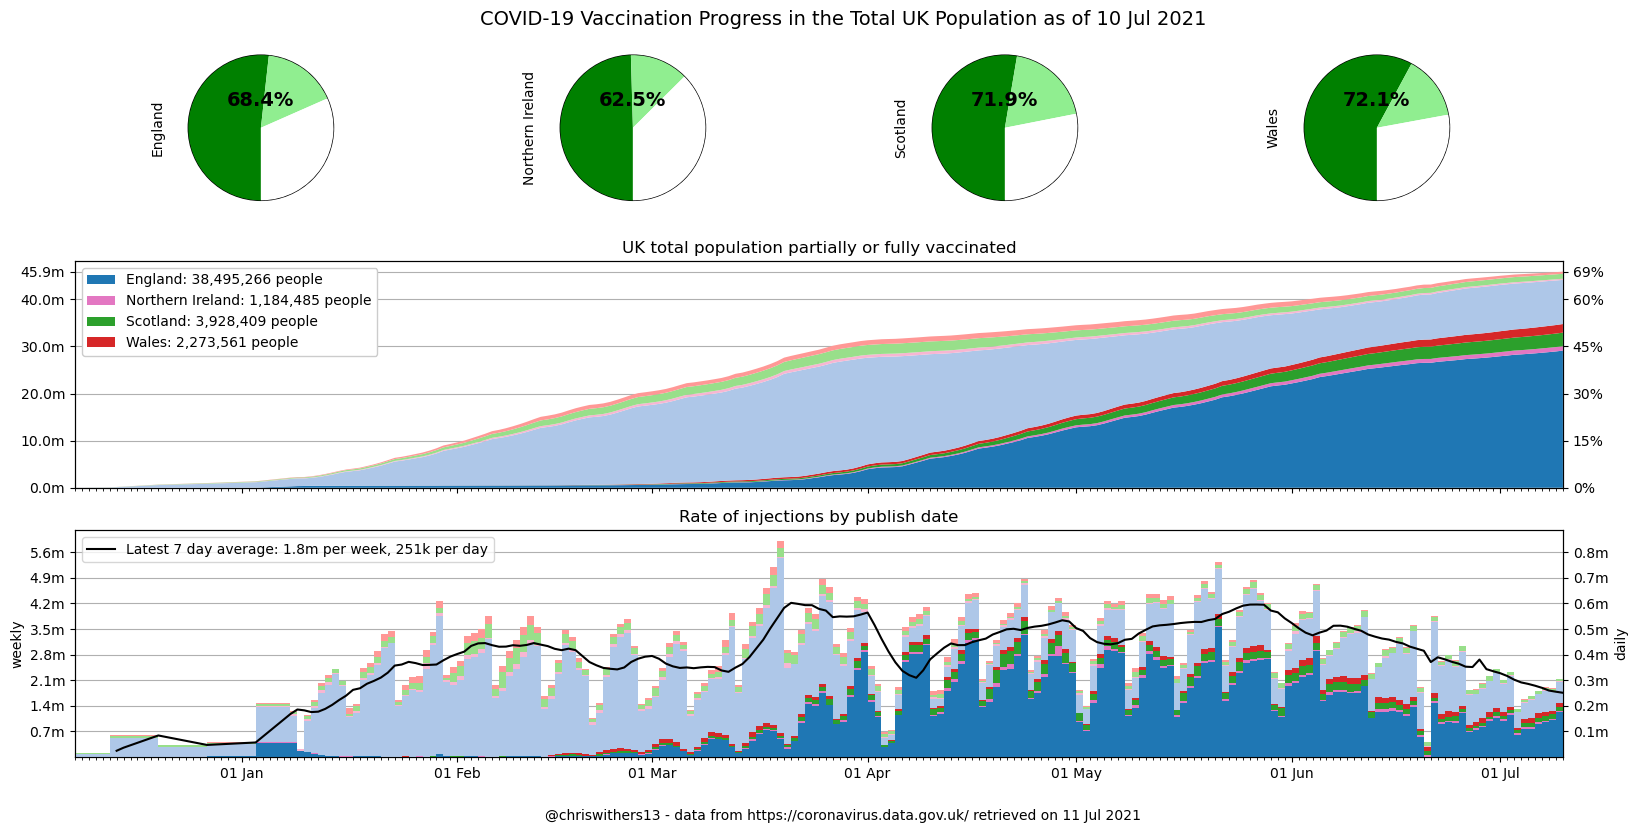

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

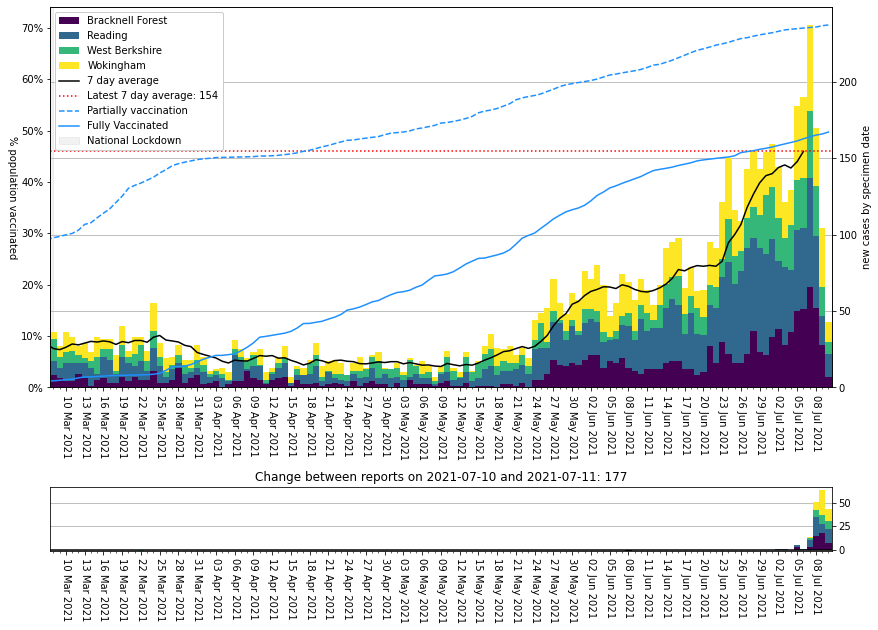

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=population_vaccinated)

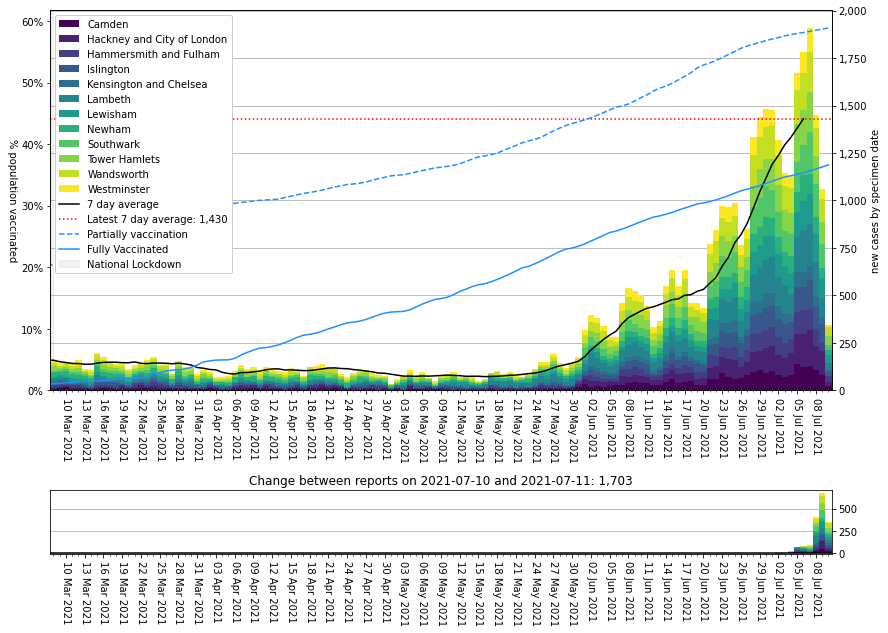

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000023,South Tyneside,1276.361806,1927.0,2021-07-10
E08000024,Sunderland,854.503880,2373.0,2021-07-10
E08000037,Gateshead,849.768627,1717.0,2021-07-10
E06000001,Hartlepool,848.787675,795.0,2021-07-10
E06000002,Middlesbrough,816.427862,1151.0,2021-07-10
E06000012,North East Lincolnshire,815.351930,1301.0,2021-07-10
E08000021,Newcastle upon Tyne,767.782841,2325.0,2021-07-10
E06000003,Redcar and Cleveland,728.399563,999.0,2021-07-10
E06000047,County Durham,681.954521,3615.0,2021-07-10


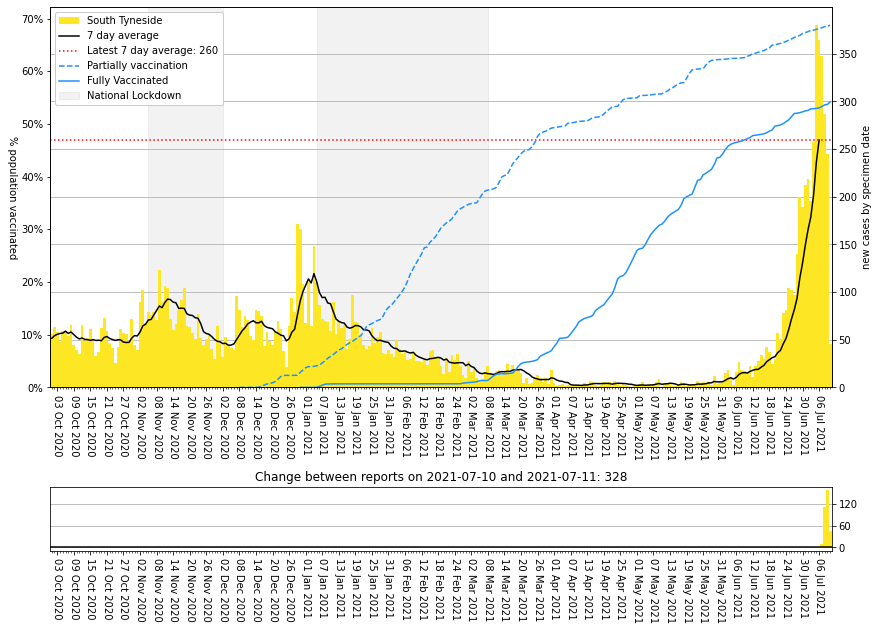

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,496.382097,3937.0,2021-07-10
E08000025,Birmingham,338.408290,3864.0,2021-07-10
E06000047,County Durham,681.954521,3615.0,2021-07-10
E08000024,Sunderland,854.503880,2373.0,2021-07-10
E08000003,Manchester,423.436036,2341.0,2021-07-10
S12000049,Glasgow City,368.966389,2336.0,2021-07-10
E08000021,Newcastle upon Tyne,767.782841,2325.0,2021-07-10
E08000012,Liverpool,422.052759,2102.0,2021-07-10
S12000036,City of Edinburgh,398.338826,2091.0,2021-07-10


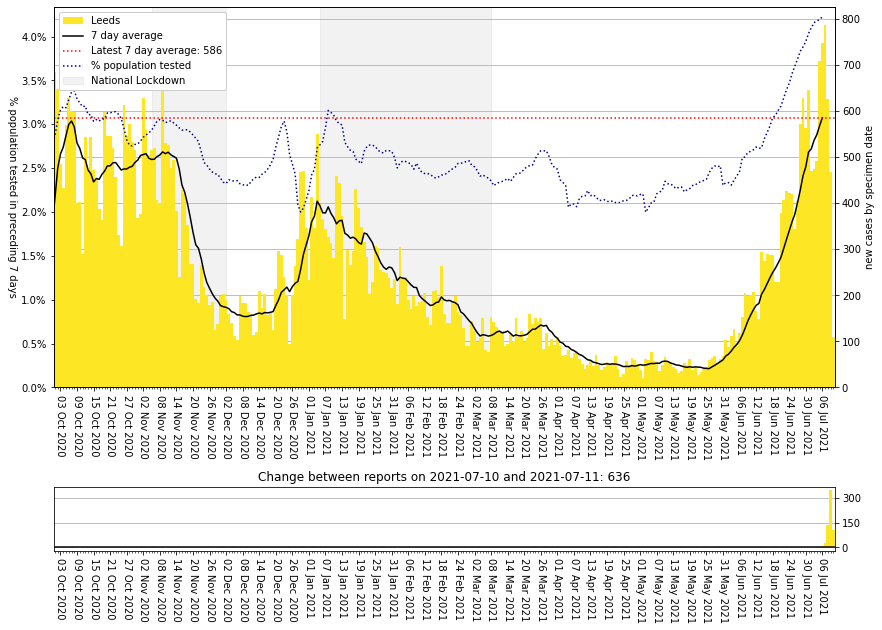

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [19]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 3.0
phe_max = 1.3

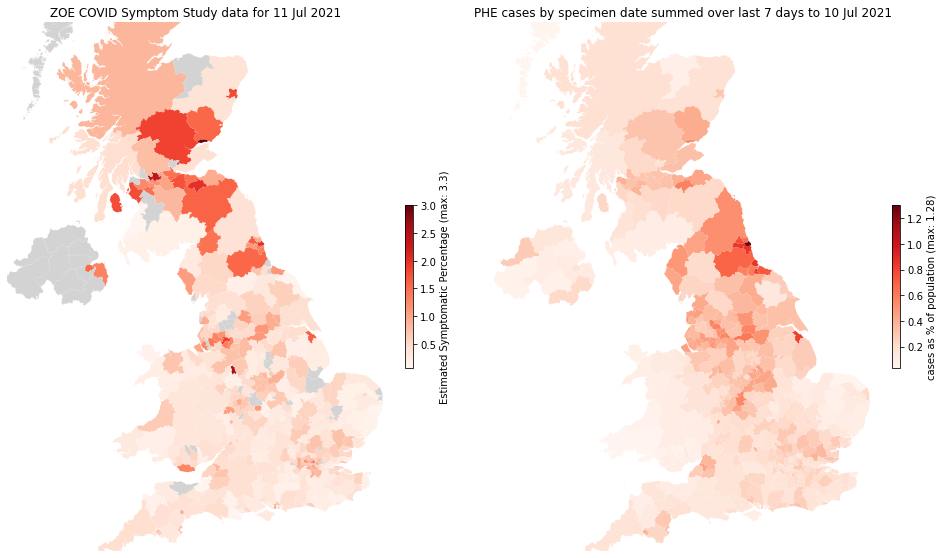

In [20]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [21]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...